In [1]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip drive/MyDrive/jigsaw-toxic-comment-classification-challenge.zip -d data

Archive:  drive/MyDrive/jigsaw-toxic-comment-classification-challenge.zip
  inflating: data/sample_submission.csv.zip  
  inflating: data/test.csv.zip       
  inflating: data/test_labels.csv.zip  
  inflating: data/train.csv.zip      


In [4]:
train_data=pd.read_csv('data/train.csv.zip')

In [ ]:
train_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [5]:
test_data=pd.read_csv('data/test.csv.zip')

In [ ]:
test_data

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [ ]:
test_label=pd.read_csv('data/test_labels.csv.zip')
test_label

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1


In [6]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def remove_stop_word(text):
  words = [word for word in text.split() if word.lower() not in ENGLISH_STOP_WORDS]
  return " ".join(words)

In [7]:
import string
def remove_punc(text):
  return text.translate(str.maketrans('', '', string.punctuation))

In [10]:
import nltk
from nltk.stem.porter import PorterStemmer

def stem(text):
  porter_stemmer = PorterStemmer()
  words = [porter_stemmer.stem(word) for word in text.split()]
  return " ".join(words)

In [12]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text
#https://www.kaggle.com/gtskyler/toxic-comments-bert

In [42]:
train_data['comment_texxxt'] = train_data['comment_text'].map(lambda text: clean_text(text)).map(lambda text: remove_punc(text)).map(lambda text: remove_stop_word(text))
test_data['comment_texxxt'] = test_data['comment_text'].map(lambda text: clean_text(text)).map(lambda text: remove_punc(text)).map(lambda text: remove_stop_word(text))

In [14]:
train_data['comment_texxt'] = train_data['comment_text'].map(lambda text: clean_text(text))
test_data['comment_texxt'] = test_data['comment_text'].map(lambda text: clean_text(text))

In [43]:
train_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_texxxt,comment_texxt
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits username hardcore metallica ...,explanation why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d aww matches background colour seemingly stuc...,d aww he matches this background colour i am s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man really trying edit war just guy consta...,hey man i am really not trying to edit war it ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,make real suggestions improvement wondered sec...,more i cannot make any real suggestions on imp...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page,you sir are my hero any chance you remember wh...
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,second time asking view completely contradicts...,and for the second time of asking when your vi...
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,ashamed horrible thing talk page 128 61 19 93,you should be ashamed of yourself that is a ho...
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,spitzer umm theres actual article prostitution...,spitzer umm theres no actual article for prost...
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,looks like actually speedy version deleted look,and it looks like it was actually you who put ...


In [46]:
test_data

,id,comment_text,comment_texxt,comment_texxxt
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you wi...,yo bitch ja rule succesful whats hating sad mo...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,from rfc the title is fine as it is imo,rfc title fine imo
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",sources zawe ashton on lapland,sources zawe ashton lapland
3,00017563c3f7919a,":If you have a look back at the source, the in...",if you have a look back at the source the info...,look source information updated correct form g...
4,00017695ad8997eb,I don't anonymously edit articles at all.,i do not anonymously edit articles at all,anonymously edit articles
...,...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",i totally agree this stuff is nothing but too ...,totally agree stuff long crap
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,throw from out field to home plate does it get...,throw field home plate does faster throwing cu...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",okinotorishima categories i see your changes a...,okinotorishima categories changes agree correc...
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",one of the founding nations of the eu germany ...,founding nations eu germany law return quite s...


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [47]:
# train_values_x = train_data['comment_texxt'].values
train_values_x = train_data['comment_texxxt'].values
train_values_y = train_data[["toxic","severe_toxic","obscene","threat","insult","identity_hate"]].values

In [48]:
train_values_x

array(['explanation edits username hardcore metallica fan reverted vandalisms just closure gas voted new york dolls fac remove template talk page retired 89 205 38 27',
       'd aww matches background colour seemingly stuck thanks talk 21 51 january 11 2016 utc',
       'hey man really trying edit war just guy constantly removing relevant information talking edits instead talk page care formatting actual info',
       ...,
       'spitzer umm theres actual article prostitution ring crunch captain',
       'looks like actually speedy version deleted look',
       'really think understand came idea bad right away kind community goes bad ideas away instead helping rewrite'],
      dtype=object)

In [49]:
train_values_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [50]:
# Split training, validation set
train_x, val_x, train_y, val_y = train_test_split(train_values_x, train_values_y, test_size=0.2, random_state=30)

In [52]:
val_x

array(['syrian army advancing aleppo russian air cover article inherently unstable article edited appropriately war progresses just means unstable',
       'oppose zero benefit readers particularly mobile users ambiguous titles justin brown defensive lineman born 1982 gridiron football defensive end justin brown wide receiver born 1991 american football wide receiver justin brown aquanaut american professional aquanaut clearly titled wp criteria moment leave',
       'file skin teeth handbill jpg added comment asking addition copyright status warnings attached image understand wrong attached low res version promotional item comes fair use photograph covered fair use angle tell think need add covered',
       ...,
       'really selflessness just general opinion people stock person life prefer judge judge contributions good bad short biography userpage think people treated differently age background really liked',
       'june 2007 stop continue ignore policies introducing inappropriate

In [53]:
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)

(127656,)
(127656, 6)
(31915,)
(31915, 6)


In [23]:
# Tokenize training data
vocab_len = 100000
tokenizer = Tokenizer(num_words = vocab_len, oov_token='<oov>')
tokenizer.fit_on_texts(train_data['comment_texxt'])

In [54]:
# Encode training data sentences into sequences
train_seq = tokenizer.texts_to_sequences(train_x)

In [55]:
# Get our training data word index
word_index = tokenizer.word_index

In [56]:
# Get max training sequence length
maxlen = max([len(x) for x in train_seq])
print(maxlen)

1250


In [57]:
# Pad the training sequences
train_pad = pad_sequences(train_seq, maxlen = maxlen,
                          padding = 'pre',
                          truncating='pre')

In [58]:
train_pad[0:2]

array([[   0,    0,    0, ..., 6712,  110, 1299],
       [   0,    0,    0, ...,   37,   98,  288]], dtype=int32)

In [59]:
# print("\nTraining sequences:\n", train_seq)
# print("\nPadded training sequences:\n", train_pad)
print("\nPadded training shape:", train_pad.shape)
print("Training sequences data type:", type(train_seq))
print("Padded Training sequences data type:", type(train_pad))


Padded training shape: (127656, 1250)
Training sequences data type: <class 'list'>
Padded Training sequences data type: <class 'numpy.ndarray'>


In [60]:
val_seq = tokenizer.texts_to_sequences(val_x)
val_pad = pad_sequences(val_seq, maxlen = maxlen,
                        padding = 'pre',
                        truncating='pre')

In [61]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

187003

In [ ]:
# !wget dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip

In [32]:
!unzip drive/MyDrive/crawl-300d-2M.vec.zip

Archive:  drive/MyDrive/crawl-300d-2M.vec.zip
  inflating: crawl-300d-2M.vec       


In [33]:
import io
from tqdm.auto import tqdm

print('loading word embeddings...')
embeddings_index = {}
f = io.open('crawl-300d-2M.vec', encoding='utf-8')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))

loading word embeddings...


0it [00:00, ?it/s]

found 1999996 word vectors


In [34]:
# Prepare embedding matrix
print('preparing embedding matrix...')
words_not_found = []
nb_words = vocab_size
embedding_matrix = np.zeros((nb_words, 300))

for word, i in tokenizer.word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
        
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 84211


In [35]:
def plot_learning_curve(history):
  plt.plot(history.history['loss'], label='training')
  plt.plot(history.history['val_loss'], label='validation')
  plt.legend()
  plt.show()

In [36]:
def CNN_model(kernel_num=32, kernel_sizes=[1]):
  # Input
  input = tf.keras.Input(shape=(maxlen))

  # Embedding layers
  embedding = tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=kernel_num, 
        input_length=maxlen
  )

  embed_out = embedding(input)

  # Convolutional layers (seperate convs for each word groups)
  conv_list = [tf.keras.layers.Conv1D(
      kernel_num, 
      k,
      activation='relu',
      padding='same') for k in kernel_sizes]
    
  conv_outs = [conv(embed_out) for conv in conv_list]

  # Max pooling layer (one for each convolutional layer)
  max_pool = tf.keras.layers.MaxPooling1D(pool_size=maxlen)
  pool_outs = [max_pool(conv_out) for conv_out in conv_outs]

  # Concatenate layer
  concate = tf.keras.layers.Concatenate()(pool_outs)

  # Flatten layer
  flatten_out = tf.keras.layers.Flatten()(concate)

  # Drop out
  # drop_out = tf.keras.layers.Dropout(0.2)(flatten_out)

  # Output
  output = tf.keras.layers.Dense(6)(flatten_out)

  # CNN model
  return tf.keras.Model(inputs=[input], outputs=[output])

In [62]:
cnn_128_3_4_5 = CNN_model(kernel_num=128, kernel_sizes=[3, 4, 5])

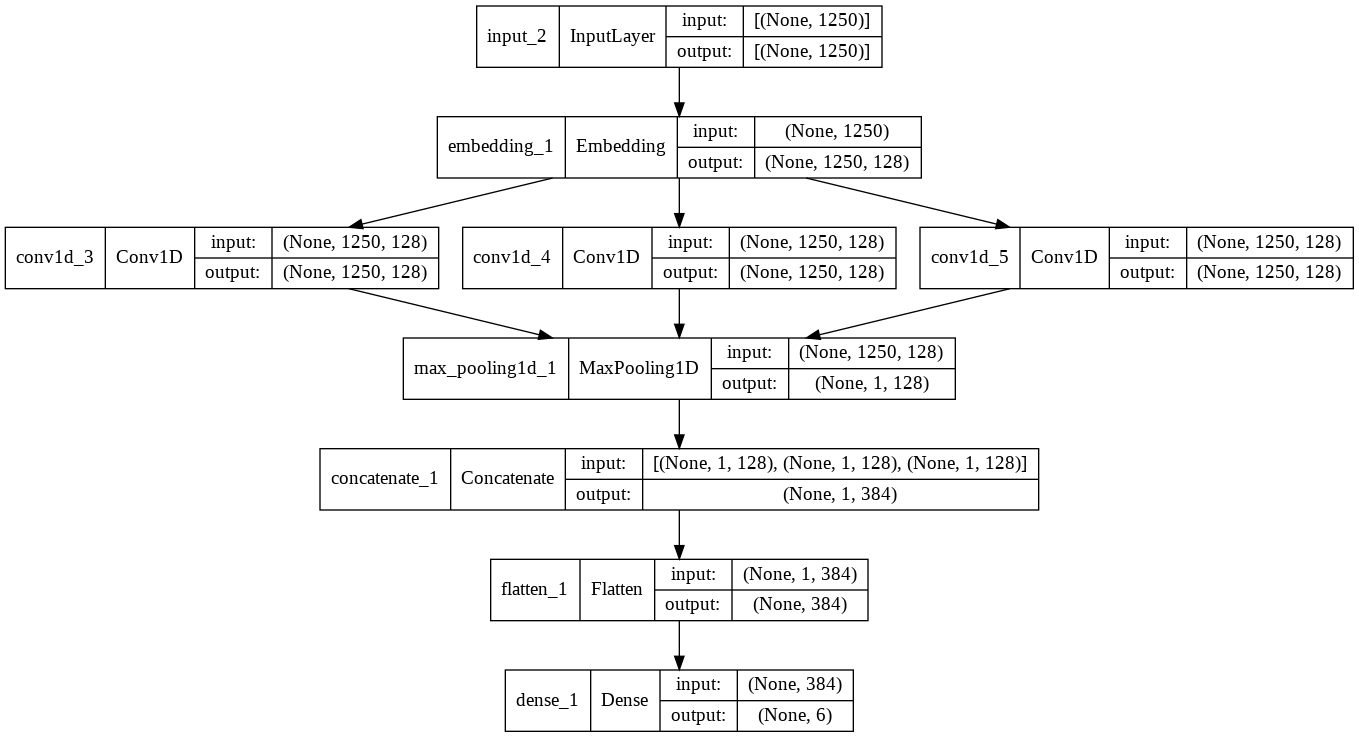

In [63]:
tf.keras.utils.plot_model(cnn_128_3_4_5, show_shapes=True)

In [64]:
cnn_128_3_4_5.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1250)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 1250, 128)    23936384    ['input_2[0][0]']                
                                                                                                  
 conv1d_3 (Conv1D)              (None, 1250, 128)    49280       ['embedding_1[0][0]']            
                                                                                                  
 conv1d_4 (Conv1D)              (None, 1250, 128)    65664       ['embedding_1[0][0]']            
                                                                                            

In [65]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=1,
    mode='min',
    verbose=1
)

cnn_128_3_4_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    optimizer = 'adam'
)

history_cnn = cnn_128_3_4_5.fit(
    train_pad,
    train_y,
    epochs = 4,
    validation_data=(val_pad, val_y), 
    batch_size = 32,
    callbacks=[early_stopping]
)

Epoch 1/4
3990/3990 [==============================] - 578s 145ms/step - loss: 0.0583 - val_loss: 0.0472
Epoch 2/4
3990/3990 [==============================] - 580s 145ms/step - loss: 0.0359 - val_loss: 0.0492
Epoch 00002: early stopping


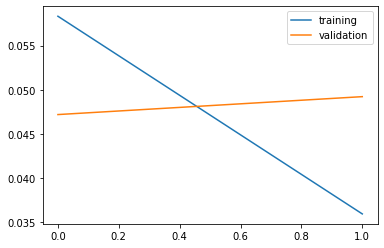

In [67]:
plot_learning_curve(history_cnn)

In [66]:
test_seq = tokenizer.texts_to_sequences(test_data.comment_text)
test_pad = pad_sequences(test_seq, maxlen = maxlen,
                                padding = 'pre',
                                truncating='pre')

In [68]:
def prepare_submit_file(model, batch_size=200):
  predicted = tf.math.sigmoid(model.predict(test_pad, batch_size = 200))
  predict = np.hstack((test_data.id[:, np.newaxis], predicted))

  subm = pd.DataFrame(predict, columns = ['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
  subm.to_csv('subm.csv', index = False)

  print(subm)

In [70]:
prepare_submit_file(cnn_128_3_4_5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


                      id      toxic  ...      insult identity_hate
0       00001cee341fdb12   0.994058  ...    0.927349      0.664411
1       0000247867823ef7  0.0524221  ...  0.00327659   0.000158358
2       00013b17ad220c46   0.119657  ...   0.0332916    0.00240664
3       00017563c3f7919a   0.183237  ...   0.0205371   0.000985068
4       00017695ad8997eb   0.168306  ...    0.019743    0.00135804
...                  ...        ...  ...         ...           ...
153159  fffcd0960ee309b5   0.903679  ...   0.0616786    0.00232643
153160  fffd7a9a6eb32c16  0.0939113  ...   0.0228619    0.00155436
153161  fffda9e8d6fafa9e  0.0601308  ...   0.0148549   0.000493071
153162  fffe8f1340a79fc2   0.174068  ...   0.0261987     0.0222033
153163  ffffce3fb183ee80   0.995997  ...    0.835864     0.0992712

[153164 rows x 7 columns]
